In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
data = pd.read_csv("online_gaming_behavior_dataset.csv")
df = data.copy()

In [3]:
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


<Axes: >

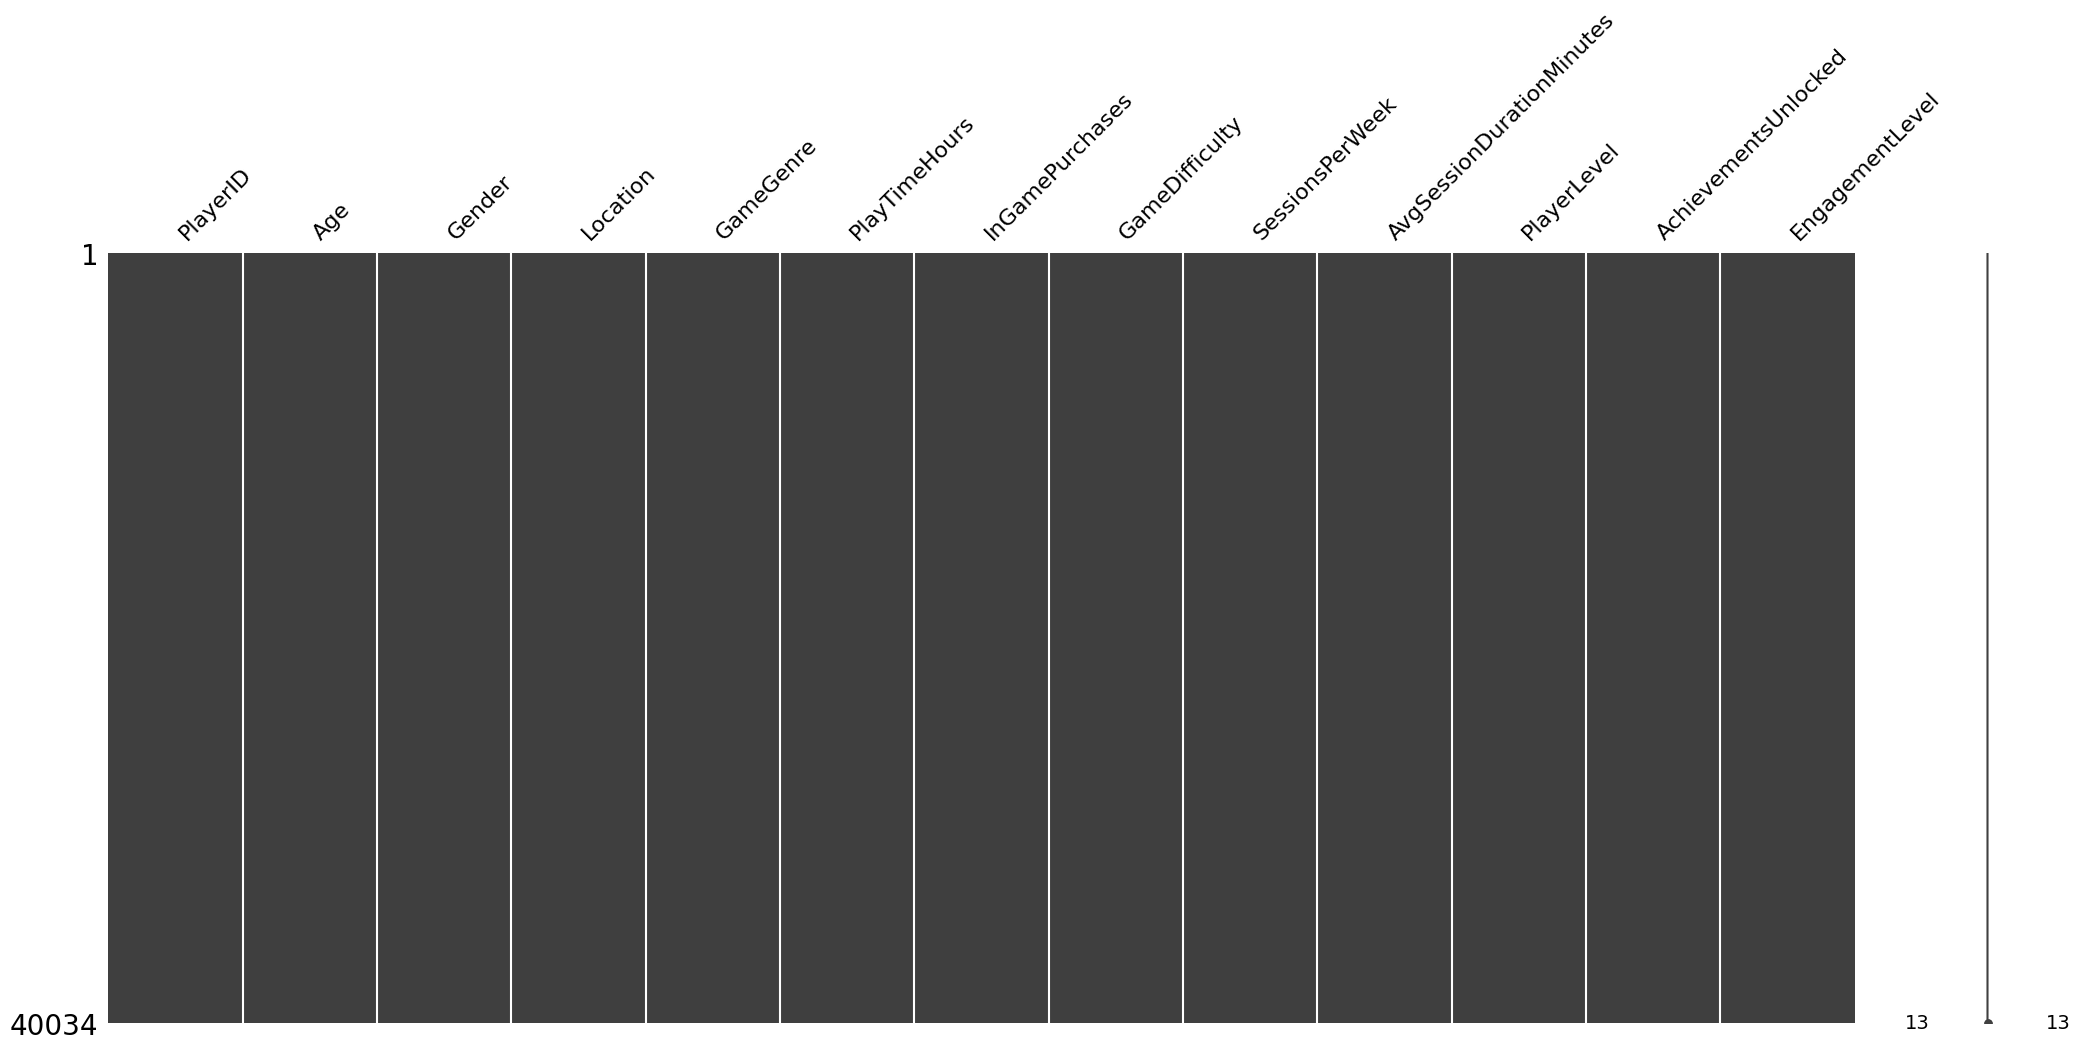

In [4]:
import missingno as msno
msno.matrix(df)

- Target -> engagementLevel

In [5]:
columns_DF = df.columns
columns_DF

Index(['PlayerID', 'Age', 'Gender', 'Location', 'GameGenre', 'PlayTimeHours',
       'InGamePurchases', 'GameDifficulty', 'SessionsPerWeek',
       'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked',
       'EngagementLevel'],
      dtype='object')

In [6]:
df["Location"].unique()

array(['Other', 'USA', 'Europe', 'Asia'], dtype=object)

In [7]:
df["GameGenre"].unique()

array(['Strategy', 'Sports', 'Action', 'RPG', 'Simulation'], dtype=object)

In [8]:
drop_columns = ["PlayerID","AchievementsUnlocked"]
df = df.drop(columns= drop_columns)

In [9]:
df.head()

,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,EngagementLevel
0,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,Medium
1,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,Medium
2,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,High
3,35,Male,USA,Action,5.265351,1,Easy,9,85,57,Medium
4,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,Medium


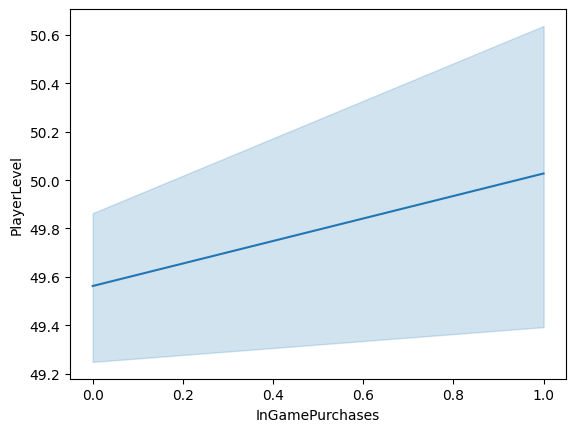

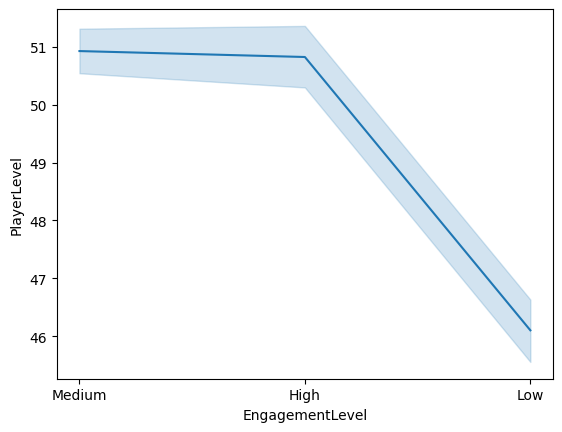

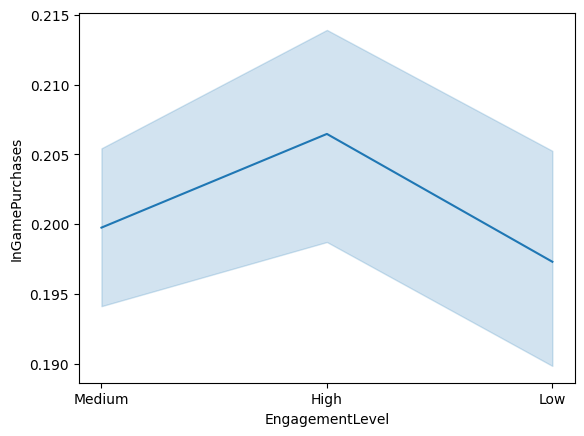

In [10]:
sns.lineplot(x=df["InGamePurchases"],y=df["PlayerLevel"])
plt.show()

sns.lineplot(x=df["EngagementLevel"],y=df["PlayerLevel"])
plt.show()

sns.lineplot(x=df["EngagementLevel"],y=df["InGamePurchases"])
plt.show()

#### test-train

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler,LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

In [12]:
Y = df["EngagementLevel"]
X = df.drop(columns="EngagementLevel")

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42,stratify=df.iloc[:,-1])

In [13]:
print("y train : ",y_train.value_counts())
print("y test : ",y_test.value_counts())

y train :  EngagementLevel
Medium    15499
High       8269
Low        8259
Name: count, dtype: int64
y test :  EngagementLevel
Medium    3875
High      2067
Low       2065
Name: count, dtype: int64


In [14]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

ohe = OneHotEncoder(sparse_output=False, drop='first')

encoded_train = ohe.fit_transform(x_train[['Gender', 'Location', 'GameGenre','GameDifficulty']])
feature_names = ohe.get_feature_names_out(['Gender', 'Location', 'GameGenre','GameDifficulty'])
encoded_train_df = pd.DataFrame(encoded_train, columns=feature_names, index=x_train.index)

encoded_test = ohe.transform(x_test[['Gender', 'Location', 'GameGenre','GameDifficulty']])
encoded_test_df = pd.DataFrame(encoded_test, columns=feature_names, index=x_test.index)

x_train = x_train.drop(['Gender', 'Location', 'GameGenre','GameDifficulty'], axis=1)
x_test = x_test.drop(['Gender', 'Location', 'GameGenre','GameDifficulty'], axis=1)

x_train = pd.concat([x_train, encoded_train_df], axis=1)
x_test = pd.concat([x_test, encoded_test_df], axis=1)



In [15]:
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [16]:
models = {
    'Logistic Regression': LogisticRegression(),
    'RandomForest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    print(model_name)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')  # veya 'weighted'
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    cm = confusion_matrix(y_test, y_pred)

    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1-Score:", f1)
    print("Confusion Matrix:\n", cm)
    print(30*"-")

Logistic Regression
Accuracy: 0.8177844386162109
Precision: 0.8251245338771556
Recall: 0.7996023760910234
F1-Score: 0.8101908771718961
Confusion Matrix:
 [[1719   71  277]
 [  59 1419  587]
 [ 160  305 3410]]
------------------------------
RandomForest
Accuracy: 0.8877232421631073
Precision: 0.8889199691129361
Recall: 0.8780766933165296
F1-Score: 0.8830817870610633
Confusion Matrix:
 [[1771   70  226]
 [  59 1769  237]
 [ 113  194 3568]]
------------------------------
Support Vector Machine
Accuracy: 0.8761084051454977
Precision: 0.8808813239388723
Recall: 0.8625391366367463
F1-Score: 0.8707558500477742
Confusion Matrix:
 [[1756   69  242]
 [  59 1684  322]
 [ 110  190 3575]]
------------------------------


- Exclusive Synthetic Dataset
- This dataset is synthetic and was generated for educational purposes, making it ideal for data science and machine learning projects. It is an original dataset, owned by Mr. Rabie El Kharoua, and has not been previously shared. You are free to use it under the license outlined on the data card. The dataset is offered without any guarantees. Details about the data provider will be shared soon.